In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [2]:
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')

In [3]:
x = np.linspace(0, 1, num=10)
y = np.sin(2*np.pi*x) + np.random.normal(0, 0.2, (10))

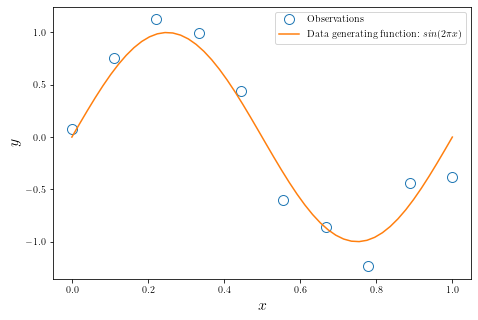

In [4]:
plt.figure(figsize=(7.5, 5))
plt.plot(x, y, 'o', markersize = '10', fillstyle='none', label='Observations')
plt.plot(np.linspace(0, 1, num=50), np.sin(2*np.pi*np.linspace(0, 1, num=50)), '-', label='Data generating function: $sin(2\pi x)$')
plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel(r'$y$', fontsize = 16)
plt.legend()
plt.show()

### The polynomial function

Fit the data using a polynomial function of the form: 
$$
f(x, \boldsymbol{w} ) = w_0 + w_1 x + w_2 x^2 + ... + w_M x^M = \sum^{M}_{j=0}{w_j x^j}.
$$
Let $\phi_j(x) = x^j$ be the basis function, the vector form of the above polynomial function is
$$
f(x, \boldsymbol{w} ) = \sum^{M}_{j=0}{w_j \phi_j(x)} = \boldsymbol{w}^\top\boldsymbol{\phi},
$$
where $\boldsymbol{w} = \begin{bmatrix} w_0 & ... & w_M \end{bmatrix}^\top$, and $\boldsymbol{\phi} = \begin{bmatrix} \phi_0(x) & ... & \phi_M(x) \end{bmatrix}^\top$

### The mean square error function
Given N observations of $x$:
$$\boldsymbol{x} = \begin{bmatrix} x_1 & ... & x_N \end{bmatrix}^\top, $$
and N corresponding observations of $y$:
$$\boldsymbol{y} = \begin{bmatrix} y_1 & ... & y_N \end{bmatrix}^\top, $$
the mean-square error (MSE) function is 
$$\text{MSE}(\boldsymbol{w}) = \frac{1}{N} \sum^{N}_{n=1}[ f(x_n, \boldsymbol{w}) - y_n ]^2,$$
or in the matrix form:
$$\text{MSE}(\boldsymbol{w}) = \frac{1}{N}(\boldsymbol{\Phi}\boldsymbol{w} - \boldsymbol{y})^\top(\boldsymbol{\Phi}\boldsymbol{w} - \boldsymbol{y}),$$
where 
$$\boldsymbol{\Phi} = \begin{bmatrix} 
\phi_0(x_1) & \phi_1(x_1) & \dots & \phi_M(x_1) \\ 
\phi_0(x_2) & \phi_1(x_2) & \dots & \phi_M(x_2) \\
\vdots & \vdots & \ddots & \vdots \\ 
\phi_0(x_N) & \phi_1(x_N) & \dots & \phi_M(x_N) \\
\end{bmatrix}.$$

### Minimize the MSE (model fitting)

The polynomial curve fitting is done by selecting the values of the coefficients $\boldsymbol{w}$ which minimize the MSE. 

Take the derivate of MSE with respect to $\boldsymbol{w}$ and let it equal to zero, 
    $$\frac{\partial}{\partial \boldsymbol{w}} \frac{1}{N}(\boldsymbol{\Phi}\boldsymbol{w} - \boldsymbol{y})^\top(\boldsymbol{\Phi}\boldsymbol{w} - \boldsymbol{y}) = 0$$
where
$$\begin{align}\frac{\partial}{\partial \boldsymbol{w}}(\boldsymbol{\Phi}\boldsymbol{w} - \boldsymbol{y})^\top(\boldsymbol{\Phi}\boldsymbol{w} - \boldsymbol{y}) =& \frac{\partial}{\partial \boldsymbol{w}} (\boldsymbol{w}^\top\boldsymbol{\Phi}^\top - \boldsymbol{y}^\top)(\boldsymbol{\Phi}\boldsymbol{w} - \boldsymbol{y})\\ 
=& \frac{\partial}{\partial \boldsymbol{w}} (\boldsymbol{w}^\top\boldsymbol{\Phi}^\top\boldsymbol{\Phi}\boldsymbol{w} - 2\boldsymbol{y}^\top\boldsymbol{\Phi}\boldsymbol{w} + \boldsymbol{y}^\top\boldsymbol{y}) \\
=& 2\boldsymbol{w}^\top\boldsymbol{\Phi}^\top\boldsymbol{\Phi} - 2\boldsymbol{y}^\top\boldsymbol{\Phi}
\end{align}$$
Therefore the optimal coefficients $\boldsymbol{w}^*$ is
$$ \boldsymbol{w}^* = (\boldsymbol{\Phi}^\top\boldsymbol{\Phi})^{-1}\boldsymbol{\Phi}^\top\boldsymbol{y}$$

In [5]:
def polynomial(w, x): 
    
    # w is the (M+1,) coefficients vector
    # x is the (N,) input vector
    # y is the (N,) output vector
    
    N = np.size(x)
    M = np.size(w) - 1
    y = np.zeros((N,))
    
    for n in range(0, N): 
        y[n] = np.transpose(w).dot((x[n]*np.ones((M+1,)))**range(0, M+1))
     
    return y

In [6]:
def polynomial_fit(x, y, M): 
    
    # x is the (N,) input vector 
    # y is the (N,) output vector
    # M is the order of the polynomial function
    # Phi is the (N, M) design matrix
    # w is the (M+1,) coefficients vector
    
    N = np.size(x)
    Phi = np.zeros((N, M+1))
    
    for m in range(0,M+1):
        Phi[:, m] = x**m
        
    w = np.linalg.inv(np.transpose(Phi).dot(Phi)).dot(np.transpose(Phi)).dot(y)
    
    return w

### The over-fitting problem 

In [7]:
w_m0 = polynomial_fit(x, y, 0)
w_m1 = polynomial_fit(x, y, 1)
w_m3 = polynomial_fit(x, y, 3)
w_m9 = polynomial_fit(x, y, 9)

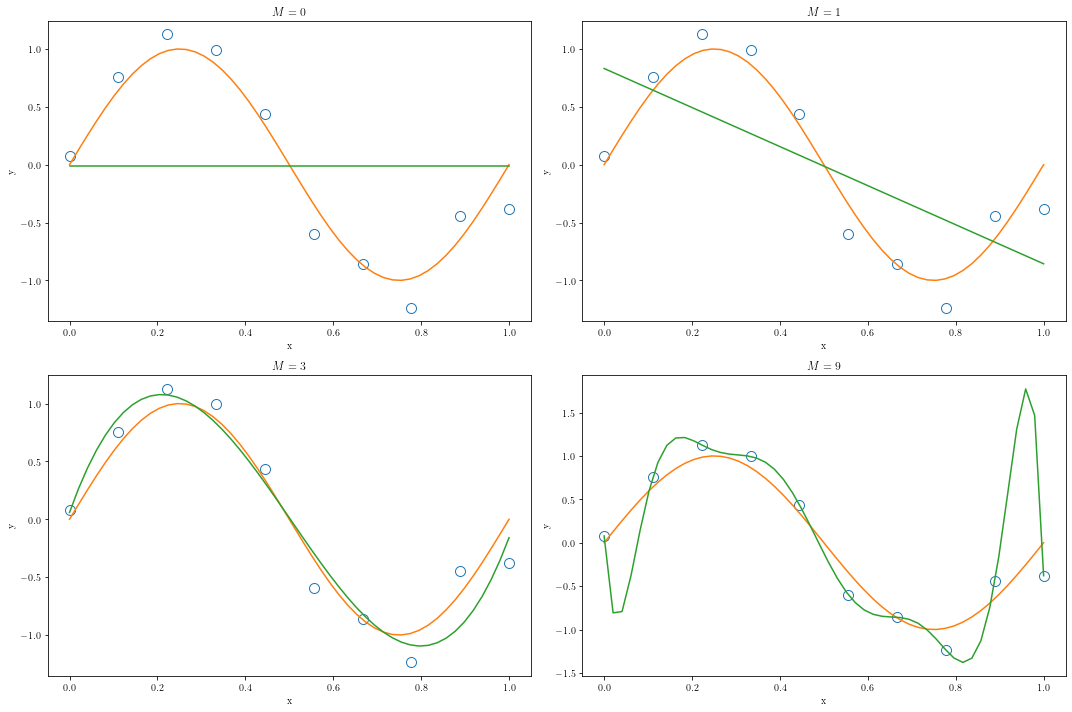

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))

axs[0, 0].plot(x, y, 'o', markersize = '10', fillstyle='none', label='Observations')
axs[0, 0].plot(np.linspace(0, 1, num=50), np.sin(2*np.pi*np.linspace(0, 1, num=50)), '-', label='Data generating function: $sin(2\pi x)$')
axs[0, 0].plot(np.linspace(0, 1, num=50), polynomial(w_m0, np.linspace(0, 1, num=50)), '-', label='Polynomial curve fitting')
axs[0, 0].set_title('$M=0$')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('y')

axs[0, 1].plot(x, y, 'o', markersize = '10', fillstyle='none', label='Observations')
axs[0, 1].plot(np.linspace(0, 1, num=50), np.sin(2*np.pi*np.linspace(0, 1, num=50)), '-', label='Data generating function: $sin(2\pi x)$')
axs[0, 1].plot(np.linspace(0, 1, num=50), polynomial(w_m1, np.linspace(0, 1, num=50)), '-', label='Polynomial curve fitting')
axs[0, 1].set_title('$M=1$')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('y')

axs[1, 0].plot(x, y, 'o', markersize = '10', fillstyle='none', label='Observations')
axs[1, 0].plot(np.linspace(0, 1, num=50), np.sin(2*np.pi*np.linspace(0, 1, num=50)), '-', label='Data generating function: $sin(2\pi x)$')
axs[1, 0].plot(np.linspace(0, 1, num=50), polynomial(w_m3, np.linspace(0, 1, num=50)), '-', label='Polynomial curve fitting')
axs[1, 0].set_title('$M=3$')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('y')

axs[1, 1].plot(x, y, 'o', markersize = '10', fillstyle='none', label='Observations')
axs[1, 1].plot(np.linspace(0, 1, num=50), np.sin(2*np.pi*np.linspace(0, 1, num=50)), '-', label='Data generating function: $sin(2\pi x)$')
axs[1, 1].plot(np.linspace(0, 1, num=50), polynomial(w_m9, np.linspace(0, 1, num=50)), '-', label='Polynomial curve fitting')
axs[1, 1].set_title('$M=9$')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('y')

plt.tight_layout()
plt.show()

In [9]:
x_n100 = np.linspace(0, 1, num=100)
y_n100 = np.sin(2*np.pi*x_n100) + np.random.normal(0, 0.2, (100))

### Increase the number of observation reduces the over-fitting problem

In [10]:
w_m9_n100 = polynomial_fit(x_n100, y_n100, 9)

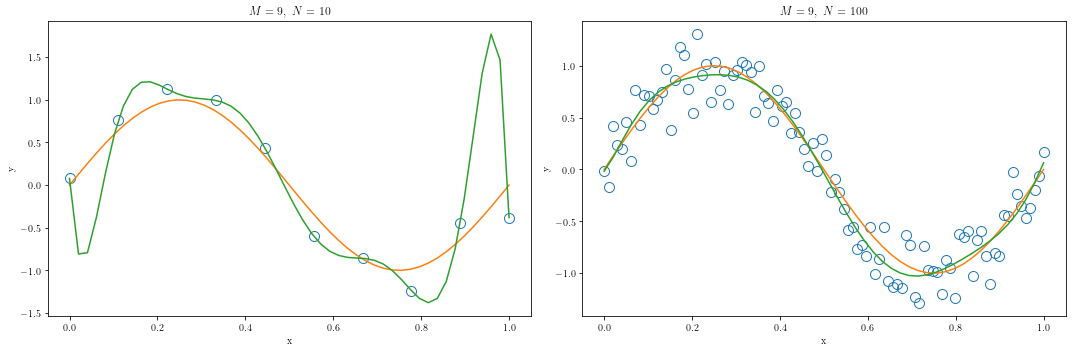

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].plot(x, y, 'o', markersize = '10', fillstyle='none', label='Observations')
axs[0].plot(np.linspace(0, 1, num=50), np.sin(2*np.pi*np.linspace(0, 1, num=50)), '-', label='Data generating function: $sin(2\pi x)$')
axs[0].plot(np.linspace(0, 1, num=50), polynomial(w_m9, np.linspace(0, 1, num=50)), '-', label='Polynomial curve fitting')
axs[0].set_title('$M=9,\ N=10$')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

axs[1].plot(x_n100, y_n100, 'o', markersize = '10', fillstyle='none', label='Observations')
axs[1].plot(np.linspace(0, 1, num=50), np.sin(2*np.pi*np.linspace(0, 1, num=50)), '-', label='Data generating function: $sin(2\pi x)$')
axs[1].plot(np.linspace(0, 1, num=50), polynomial(w_m9_n100, np.linspace(0, 1, num=50)), '-', label='Polynomial curve fitting')
axs[1].set_title('$M=9,\ N=100$')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

plt.tight_layout()
plt.show()